In [1]:
from PIL import Image, ImageDraw
import numpy as np

In [5]:
def bezier3(points, steps=1000):
    bezier_points = []
    MATRIX3 = np.array([
        [-1, 3, -3, 1],
        [3, -6, 3, 0],
        [-3, 3, 0, 0],
        [1, 0, 0, 0],
    ])
    for i in range(1, steps):
        t = 1 / steps * i
        coefficients = np.array([t**3, t**2, t, 1])
        mat = coefficients * MATRIX3

        B30 = (1-t)**3
        B31 = 3*t*((1 - t)**2)
        B32 = 3*(t**2)*(1-t)
        B33 = t**3
        x = B30 * points[0][0] + B31 * points[1][0] + B32 * points[2][0] + B33 * points[3][0]
        y = B30 * points[0][1] + B31 * points[1][1] + B32 * points[2][1] + B33 * points[3][1]
        bezier_points.append((x, y))
    return bezier_points

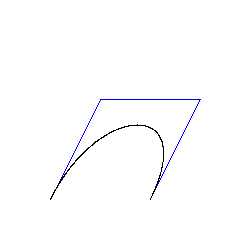

In [6]:
points = np.array([
    (1, 1),
    (2, 3),
    (4, 3),
    (3, 1),
])

im = Image.new('RGB', (250, 250), color='white')
draw = ImageDraw.Draw(im)

for i in range(0, 3):
    points[i]
    draw.line((tuple(points[i] * 50), tuple(points[i + 1] * 50)), fill='blue')

points = bezier3(points)
for (x, y) in points:
    draw.point((x * 50, y * 50), fill='black')

im.transpose(Image.FLIP_TOP_BOTTOM)

In [4]:
"""
MATRIX3 = np.array([
    [-1, 3, -3, 1],
    [3, -6, 3, 0],
    [-3, 3, 0, 0],
    [1, 0, 0, 0],
coefficients = np.array([t**3, t**2, t, 1])
mat = coefficients * MATRIX3
np.dot(points, mat)
"""

'\nMATRIX3 = np.array([\n    [-1, 3, -3, 1],\n    [3, -6, 3, 0],\n    [-3, 3, 0, 0],\n    [1, 0, 0, 0],\ncoefficients = np.array([t**3, t**2, t, 1])\nmat = coefficients * MATRIX3\nnp.dot(points, mat)\n'

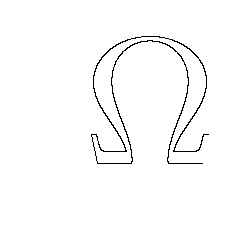

In [29]:
from symbol import SYMBOL

def s(x):
    return x * 20 + 150

im = Image.new('RGB', (250, 250), color='white')
draw = ImageDraw.Draw(im)

for element in SYMBOL:
    if len(element) == 2:
        draw.line(((s(element[0][0]), s(element[0][1])), (s(element[1][0]), s(element[1][1]))), fill='black')
    else:
        points = bezier3(element)
        for (x, y) in points:
            draw.point((s(x), s(y)), fill='black')
        
im.transpose(Image.FLIP_TOP_BOTTOM)